In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers

In [2]:
train = pd.read_csv('../input/paddy-disease-classification/train.csv')
sub = pd.read_csv('../input/paddy-disease-classification/sample_submission.csv')

In [3]:
diseases_types = sorted(list(set(train['label'])))
diseases_types

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [4]:
train_data= tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/paddy-disease-classification/train_images/",
                                                        labels='inferred',
                                                        label_mode='categorical',
                                                        class_names=diseases_types,
                                                        color_mode='rgb',
                                                        image_size=(680,480),
                                                        shuffle=True,
                                                        validation_split=0.2,
                                                        subset='training',
                                                        seed=42)

val_data= tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/paddy-disease-classification/train_images/",
                                                        labels='inferred',
                                                        label_mode='categorical',
                                                        class_names=diseases_types,   
                                                        color_mode='rgb',
                                                        image_size=(680,480),
                                                        shuffle=True,
                                                        validation_split=0.2,
                                                        subset='validation',
                                                        seed=42)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


2022-08-07 06:34:58.984840: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-07 06:34:59.159774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-07 06:34:59.163976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-07 06:34:59.179000: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [5]:
train_data

<BatchDataset shapes: ((None, 680, 480, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [6]:
resnet_model=models.Sequential()

pretrained_model=tf.keras.applications.ResNet50(include_top=False,input_shape=(680,480,3),pooling='avg',classes=10,weights='imagenet')
    
for layer in pretrained_model.layers:
    layer.trainable=False
    
    
resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512,activation='relu'))
resnet_model.add(layers.Dense(99,activation='relu'))
resnet_model.add(layers.Dense(10,activation='softmax'))

94781440/94765736 [==============================] - 3s 0us/step


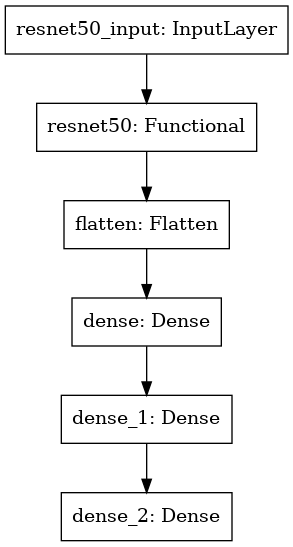

In [7]:
tf.keras.utils.plot_model(resnet_model)

In [8]:
val_data

<BatchDataset shapes: ((None, 680, 480, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [9]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
resnet_model.fit(train_data,validation_data=val_data,epochs=25)

Epoch 1/25


2022-08-07 06:35:15.552775: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-07 06:35:20.237810: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


261/261 [==============================] - 174s 611ms/step - loss: 1.4965 - accuracy: 0.5002 - val_loss: 1.1314 - val_accuracy: 0.6382
Epoch 2/25
261/261 [==============================] - 160s 607ms/step - loss: 1.0146 - accuracy: 0.6697 - val_loss: 0.9144 - val_accuracy: 0.6910
Epoch 3/25
261/261 [==============================] - 165s 627ms/step - loss: 0.7707 - accuracy: 0.7491 - val_loss: 0.8823 - val_accuracy: 0.7074
Epoch 4/25
261/261 [==============================] - 164s 622ms/step - loss: 0.6179 - accuracy: 0.7992 - val_loss: 0.6563 - val_accuracy: 0.7679
Epoch 5/25
261/261 [==============================] - 162s 617ms/step - loss: 0.4922 - accuracy: 0.8407 - val_loss: 0.5179 - val_accuracy: 0.8241
Epoch 6/25
261/261 [==============================] - 161s 611ms/step - loss: 0.4259 - accuracy: 0.8602 - val_loss: 0.4834 - val_accuracy: 0.8400
Epoch 7/25
261/261 [==============================] - 171s 650ms/step - loss: 0.3633 - accuracy: 0.8812 - val_loss: 0.5001 - val_accura

In [10]:
test_data=tf.keras.utils.image_dataset_from_directory("/kaggle/input/paddy-disease-classification/test_images/",
                                                        labels=None,
                                                        label_mode=None,
                                                        color_mode='rgb',
                                                        image_size=(680,480),
                                                        shuffle=False)

Found 3469 files belonging to 1 classes.


In [11]:
predict=tf.argmax(resnet_model.predict(test_data),axis=-1)
predict

<tf.Tensor: shape=(3469,), dtype=int64, numpy=array([7, 8, 3, ..., 8, 1, 5])>

In [12]:
predictions=[]
for i in predict:
    predictions.append(diseases_types[i])

In [13]:
sub=sub.drop(columns='label',axis=1)
sub

,image_id
0,200001.jpg
1,200002.jpg
2,200003.jpg
3,200004.jpg
4,200005.jpg
...,...
3464,203465.jpg
3465,203466.jpg
3466,203467.jpg
3467,203468.jpg


In [14]:
sub

,image_id
0,200001.jpg
1,200002.jpg
2,200003.jpg
3,200004.jpg
4,200005.jpg
...,...
3464,203465.jpg
3465,203466.jpg
3466,203467.jpg
3467,203468.jpg


In [15]:
submission=pd.DataFrame({'image_id':sub['image_id'],'label':predictions})

In [16]:
submission.to_csv('paddy_docto2.csv',index=None)